# Простые визуализации текста

### Чтение файла

In [ ]:
# укажите путь до вашего файла
with open('pin.txt', 'r', encoding='UTF-8') as f:
    text = f.read()
print(text[:50])

Часть первая

I

   В начале июля, в чрезвычайно ж


### Создадим из текста квазикорпус


In [ ]:
import spacy

In [ ]:
! python3 -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 76.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
data = []
for i in range(0, len(text), 1000000):  # потому что у spacy ограничение
                                        # на длину входной строки
    doc = nlp(text[i:i+1000000])
    for token in doc:
        word = token.text
        if word.isalpha():
            analysis = {'word': word.lower(),
                        'lemma': token.lemma_,
                        'POS': token.pos_,  # POS - часть речи, Part of speech
                        'morph': token.morph,
                        'head': token.head,
                        'Dep': token.dep_,
                        }
            data.append(analysis)

In [ ]:
data[:5]

[{'word': 'часть',
  'lemma': 'часть',
  'POS': 'NOUN',
  'morph': Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing,
  'head': вышел,
  'Dep': 'nsubj'},
 {'word': 'первая',
  'lemma': 'первый',
  'POS': 'ADJ',
  'morph': Case=Nom|Degree=Pos|Gender=Fem|Number=Sing,
  'head': I,
  'Dep': 'amod'},
 {'word': 'i',
  'lemma': 'i',
  'POS': 'ADJ',
  'morph': ,
  'head': Часть,
  'Dep': 'appos'},
 {'word': 'в',
  'lemma': 'в',
  'POS': 'ADP',
  'morph': ,
  'head': начале,
  'Dep': 'case'},
 {'word': 'начале',
  'lemma': 'начало',
  'POS': 'NOUN',
  'morph': Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,
  'head': Часть,
  'Dep': 'nmod'}]

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
df

,word,lemma,POS,morph,head,Dep
0,часть,часть,NOUN,"(Animacy=Inan, Case=Nom, Gender=Fem, Number=Sing)",вышел,nsubj
1,первая,первый,ADJ,"(Case=Nom, Degree=Pos, Gender=Fem, Number=Sing)",I,amod
2,i,i,ADJ,(),Часть,appos
3,в,в,ADP,(),начале,case
4,начале,начало,NOUN,"(Animacy=Inan, Case=Loc, Gender=Neut, Number=S...",Часть,nmod
...,...,...,...,...,...,...
173176,но,но,CCONJ,(),окончен,cc
173177,теперешний,теперешний,ADJ,"(Case=Nom, Degree=Pos, Gender=Masc, Number=Sing)",рассказ,amod
173178,рассказ,рассказ,NOUN,"(Animacy=Inan, Case=Nom, Gender=Masc, Number=S...",окончен,nsubj:pass
173179,наш,наш,DET,"(Case=Nom, Gender=Masc, Number=Sing)",окончен,nsubj:pass


Сохраним сразу, чтоб не перезапускать

In [ ]:
df.to_csv('pin_corpus.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('pin_corpus.csv')
df

,word,lemma,POS,morph,head,Dep
0,часть,часть,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing,вышел,nsubj
1,первая,первый,ADJ,Case=Nom|Degree=Pos|Gender=Fem|Number=Sing,I,amod
2,i,i,ADJ,NaN,Часть,appos
3,в,в,ADP,NaN,начале,case
4,начале,начало,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,Часть,nmod
...,...,...,...,...,...,...
173176,но,но,CCONJ,NaN,окончен,cc
173177,теперешний,теперешний,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,рассказ,amod
173178,рассказ,рассказ,NOUN,Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing,окончен,nsubj:pass
173179,наш,наш,DET,Case=Nom|Gender=Masc|Number=Sing,окончен,nsubj:pass


In [ ]:
df = df.fillna('')

## Частотные слова

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

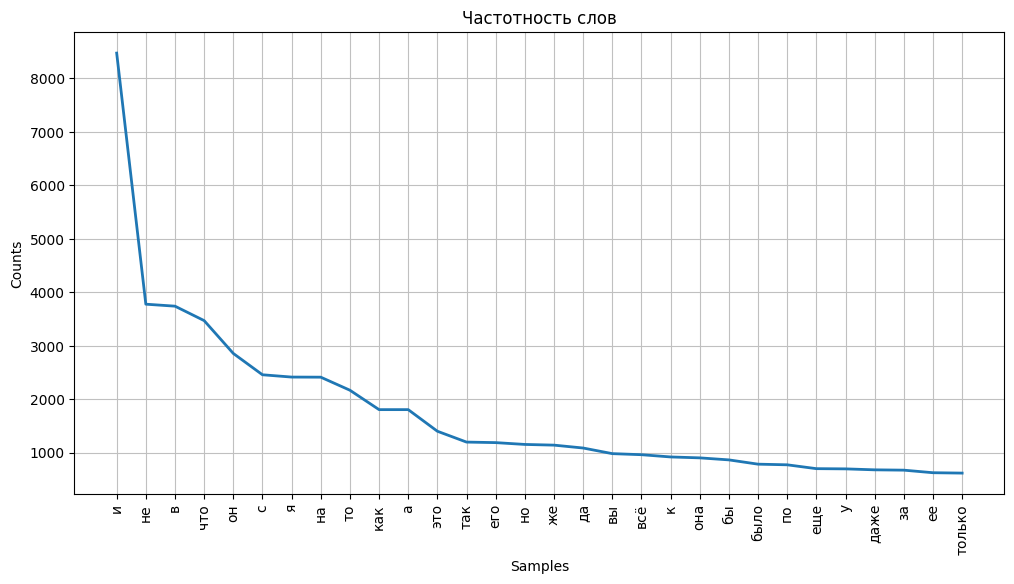

In [ ]:
plt.figure(figsize=(12, 6))   # размер графика
plt.title('Частотность слов') # название
fdist = FreqDist(df['word'])
fdist.plot(30, cumulative=False)  # сама линия

plt.show()

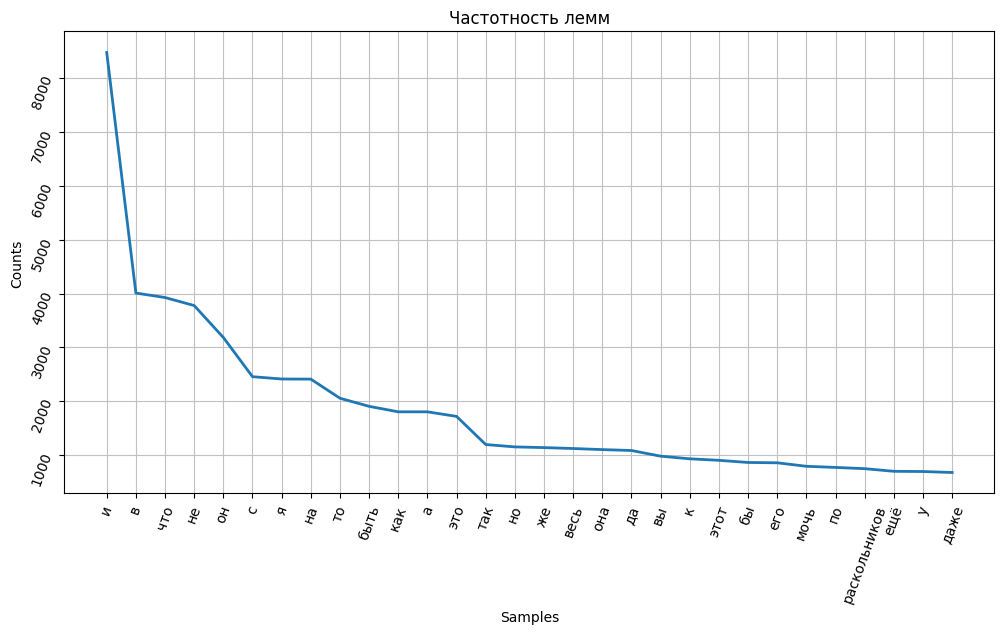

In [ ]:
plt.figure(figsize=(12, 6))   # размер графика
plt.title('Частотность лемм') # название
fdist = FreqDist(df['lemma'])
fdist.plot(30, cumulative=False)  # сама линия
plt.xticks(rotation=70)       # поворот подписей
plt.yticks(rotation=70)       # поворот подписей

plt.show()

In [ ]:
FreqDist(df['lemma']).most_common(20)

[('и', 8474),
 ('в', 4010),
 ('что', 3927),
 ('не', 3778),
 ('он', 3186),
 ('с', 2458),
 ('я', 2415),
 ('на', 2413),
 ('то', 2058),
 ('быть', 1908),
 ('как', 1806),
 ('а', 1806),
 ('это', 1721),
 ('так', 1199),
 ('но', 1155),
 ('же', 1142),
 ('весь', 1125),
 ('она', 1105),
 ('да', 1088),
 ('вы', 983)]

In [ ]:
values = [count for word, count in FreqDist(df['lemma']).most_common(20)[::-1]]
labels = [word for word, count in FreqDist(df['lemma']).most_common(20)[::-1]]

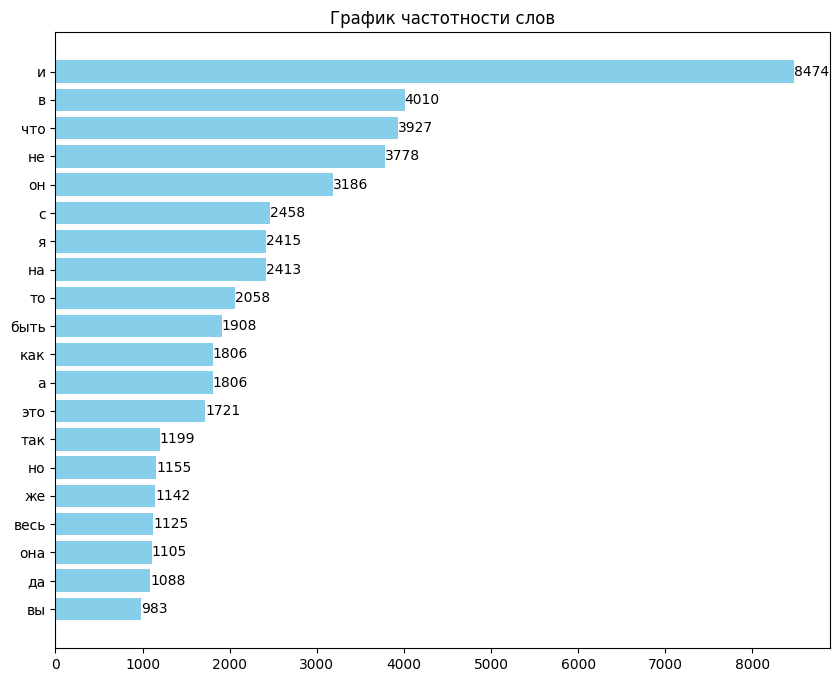

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(labels, values, color='skyblue')
ax.bar_label(bars)

plt.title("График частотности слов")
plt.show()

In [ ]:
fig.savefig('lemmas_pin.png')

### Стопслова

In [ ]:
! pip3 install nltk

In [ ]:
import nltk

In [ ]:
! python3 -m nltk.downloader stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords = nltk.corpus.stopwords.words('russian')
stopwords[:5]

['и', 'в', 'во', 'не', 'что']

In [ ]:
stopwords.extend(['это', 'свой', 'весь', 'мочь', 'который', 'ещё', 'всё'])

In [ ]:
lemmas = df['lemma'].tolist()
lemmas_notstop = [word for word in lemmas if word not in stopwords]

In [ ]:
df['lemma'].tolist() == list(df['lemma'])

True

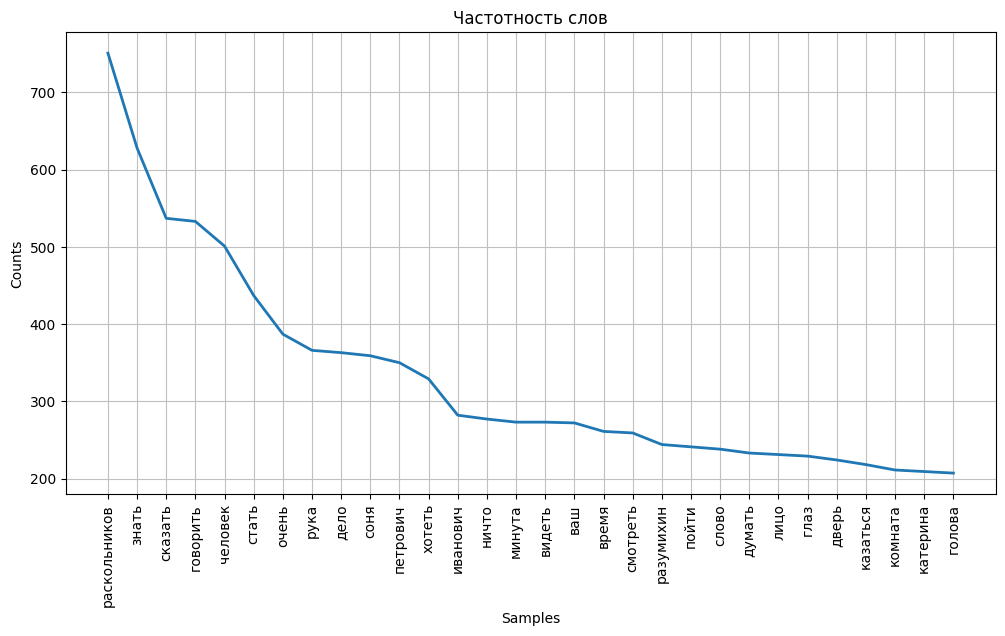

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Частотность слов')
fdist = FreqDist(lemmas_notstop)
fdist.plot(30, cumulative=False)

plt.show()

## N-граммы

- последовательности из n элементов, которые могут быть звуками, слогами, словами или буквами

"*Каждый новый день лишь один из дней*"

- биграммы:

каждый новый, новый день, день лишь, лишь один, один из, из дней

- триграммы:

каждый новый день, новый день лишь, лишь один из, один из дней

- 4-граммы:

каждый новый день лишь, новый день лишь один, день лишь один из, лишь один из дней

In [ ]:
from nltk.util import ngrams

In [ ]:
bigrams = ngrams(df['word'], 2)

In [ ]:
FreqDist(bigrams).most_common(15) # без удаления стоп-слов

[(('и', 'не'), 372),
 (('как', 'бы'), 217),
 (('да', 'и'), 207),
 (('что', 'он'), 207),
 (('что', 'я'), 198),
 (('может', 'быть'), 193),
 (('как', 'будто'), 186),
 (('и', 'в'), 174),
 (('что', 'то'), 157),
 (('и', 'с'), 156),
 (('всё', 'это'), 155),
 (('на', 'него'), 153),
 (('и', 'что'), 152),
 (('потому', 'что'), 150),
 (('тотчас', 'же'), 150)]

In [ ]:
bigrams = ngrams(lemmas_notstop, 2)
bigrams_count = FreqDist(bigrams).most_common(15)  # без стоп-слов
bigrams_count

[(('катерина', 'иванович'), 181),
 (('пётр', 'петрович'), 175),
 (('пульхерия', 'александрович'), 115),
 (('авдотья', 'романович'), 90),
 (('хе', 'хе'), 89),
 (('порфирий', 'петрович'), 77),
 (('крайний', 'мера'), 61),
 (('марфа', 'петрович'), 59),
 (('сей', 'пора'), 52),
 (('самом', 'дело'), 48),
 (('родион', 'романыч'), 48),
 (('софья', 'семёнович'), 47),
 (('одним', 'слово'), 46),
 (('андрей', 'семёнович'), 45),
 (('амалия', 'иванович'), 45)]

In [ ]:
trigrams = ngrams(lemmas_notstop, 3)
FreqDist(trigrams).most_common(15)  # без стоп-слов

[(('хе', 'хе', 'хе'), 29),
 (('ха', 'ха', 'ха'), 11),
 (('вскричать', 'пульхерия', 'александрович'), 10),
 (('крикнуть', 'катерина', 'иванович'), 9),
 (('ходить', 'взад', 'вперёд'), 7),
 (('батюшка', 'родион', 'романович'), 7),
 (('неужели', 'самом', 'дело'), 6),
 (('андрей', 'семёнович', 'лебезятников'), 6),
 (('кхе', 'кхе', 'кхе'), 6),
 (('кхи', 'кхи', 'кхи'), 6),
 (('красный', 'пятно', 'щека'), 5),
 (('пётр', 'петрович', 'лужин'), 5),
 (('родион', 'романыч', 'раскольников'), 5),
 (('схватить', 'оба', 'рука'), 5),
 (('очень', 'очень', 'очень'), 5)]

In [ ]:
values = []
labels = []
for val,lab in bigrams_count[::-1]:
  values.append(' '.join(val))
  labels.append(lab)

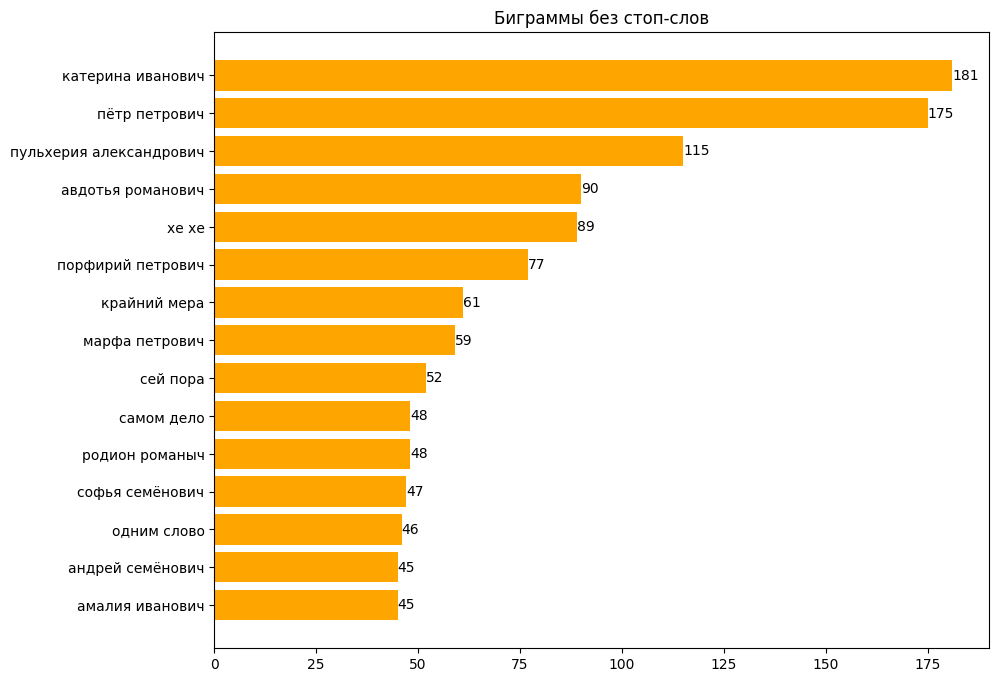

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(values, labels,  color='orange')
ax.bar_label(bars)

plt.title("Биграммы без стоп-слов");

## Нарисуем немного морфологии

#### Что с частями речи?

In [ ]:
df['POS'].value_counts()

,count
POS,
VERB,30743
NOUN,28380
PRON,21764
ADV,18522
ADP,15407
PART,12662
ADJ,11231
CCONJ,11048
DET,6858


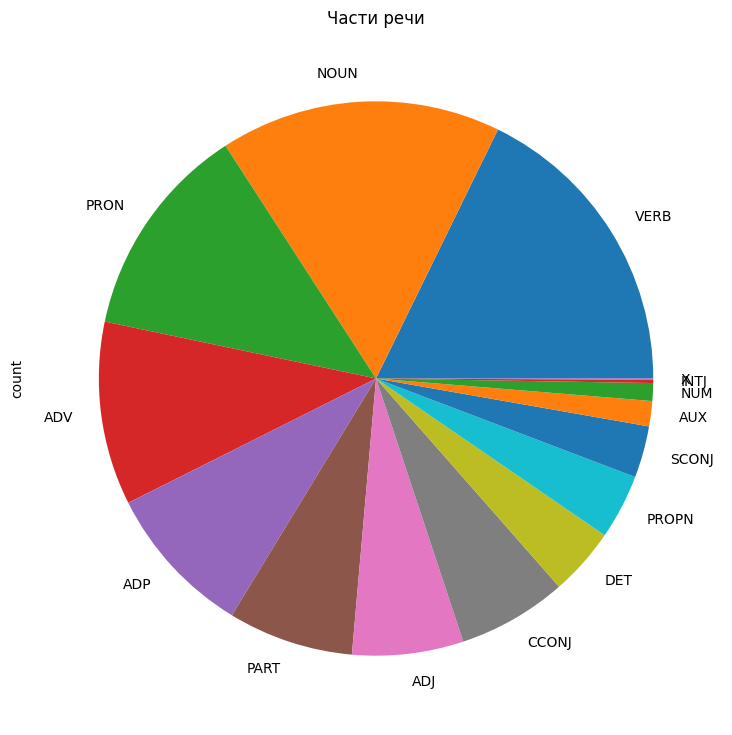

In [ ]:
# Некоторыми учёными считается, что круговые диаграммы рисовать нехорошо
# ("зрение искажает реальность")

plt.figure(figsize=(9, 9))
df['POS'].value_counts().plot(kind='pie')
plt.title('Части речи')
plt.show()

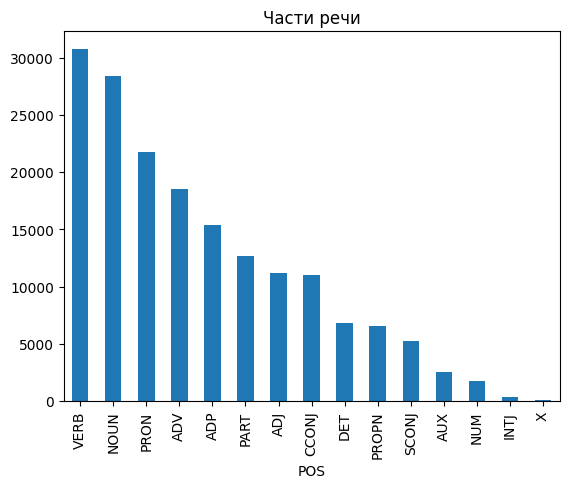

In [ ]:
plt.title('Части речи')
df['POS'].value_counts().plot(kind='bar')
plt.show()

#### Посмотрим на род и одушевлённость

In [ ]:
# df[df['morph'].str.contains('Gender=Masc')]

In [ ]:
import numpy as np

In [ ]:
df['gender'] = df['morph'].apply(lambda x: 'Masc' if 'Gender=Masc' in x else 'Fem' if 'Gender=Fem' in x else 'Neut' if 'Gender=Neut' in x else np.nan)
df['animacy'] = df['morph'].apply(lambda x: 'Inan' if 'Animacy=Inan' in x else 'Anim' if 'Animacy=Anim' in x else np.nan)

df

,word,lemma,POS,morph,head,Dep,gender,animacy
0,часть,часть,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing,вышел,nsubj,Fem,Inan
1,первая,первый,ADJ,Case=Nom|Degree=Pos|Gender=Fem|Number=Sing,I,amod,Fem,NaN
2,i,i,ADJ,,Часть,appos,NaN,NaN
3,в,в,ADP,,начале,case,NaN,NaN
4,начале,начало,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,Часть,nmod,Neut,Inan
...,...,...,...,...,...,...,...,...
173176,но,но,CCONJ,,окончен,cc,NaN,NaN
173177,теперешний,теперешний,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,рассказ,amod,Masc,NaN
173178,рассказ,рассказ,NOUN,Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing,окончен,nsubj:pass,Masc,Inan
173179,наш,наш,DET,Case=Nom|Gender=Masc|Number=Sing,окончен,nsubj:pass,Masc,NaN


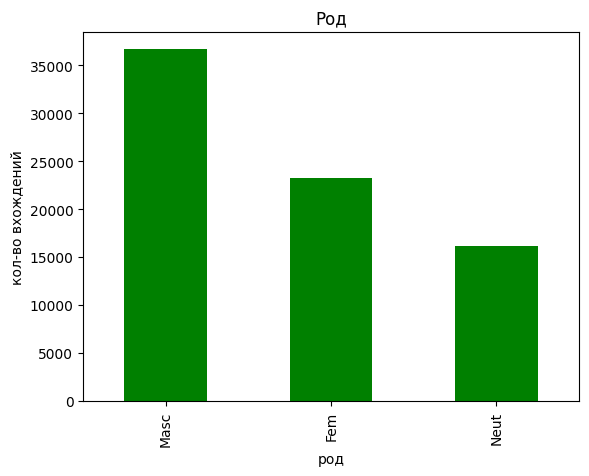

In [ ]:
plt.title('Род')
df['gender'].value_counts().plot(kind='bar', color='green')
plt.xlabel('род')               # лучше подписывать оси
plt.ylabel('кол-во вхождений')
plt.show()

Посмотрим на связь рода и одушевлённости

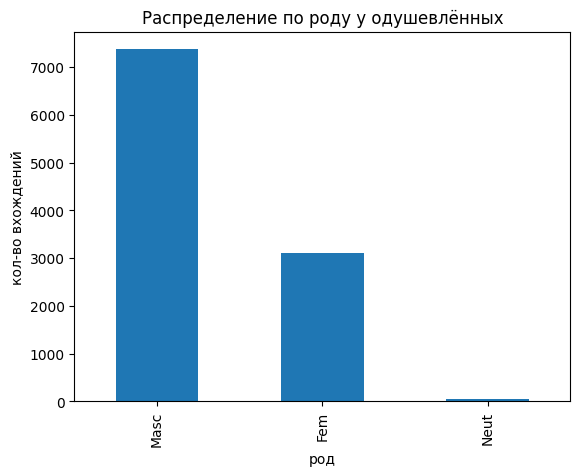

In [ ]:
df[df['animacy']=='Anim']['gender'].value_counts().plot.bar()
plt.title('Распределение по роду у одушевлённых')
plt.xlabel('род')
plt.ylabel('кол-во вхождений')
plt.show()

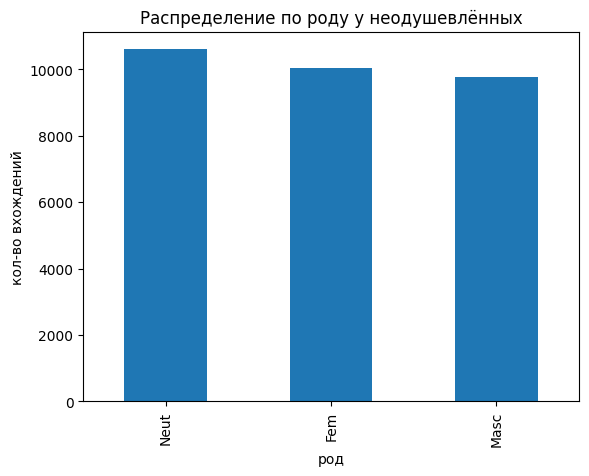

In [ ]:
df[df['animacy']=='Inan']['gender'].value_counts().plot.bar()
plt.title('Распределение по роду у неодушевлённых')
plt.xlabel('род')
plt.ylabel('кол-во вхождений')
plt.show()

## Облака слов

In [ ]:
! pip3 install wordcloud

In [ ]:
from wordcloud import WordCloud

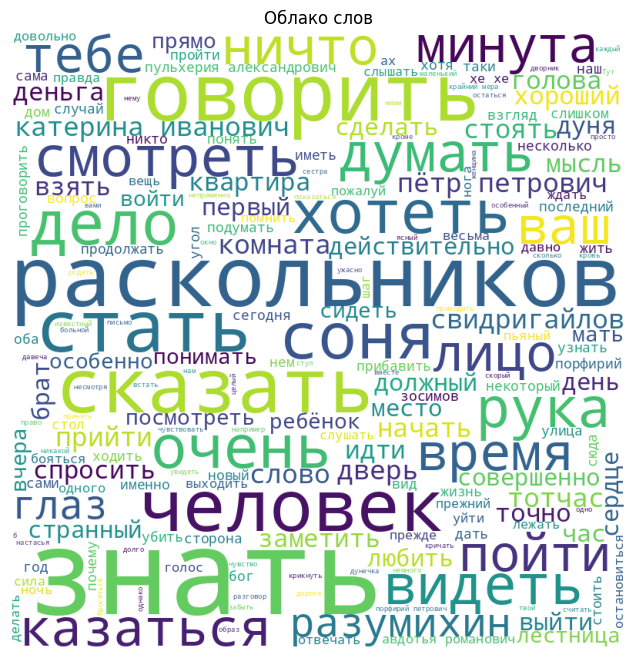

In [ ]:
text_for_cloud = ' '.join(lemmas_notstop)

wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(text_for_cloud)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

In [ ]:
wordcloud.to_file('wordcloud_lemmas.png')

In [ ]:
from PIL import Image
mask = np.array(Image.open('топор.jpg'))

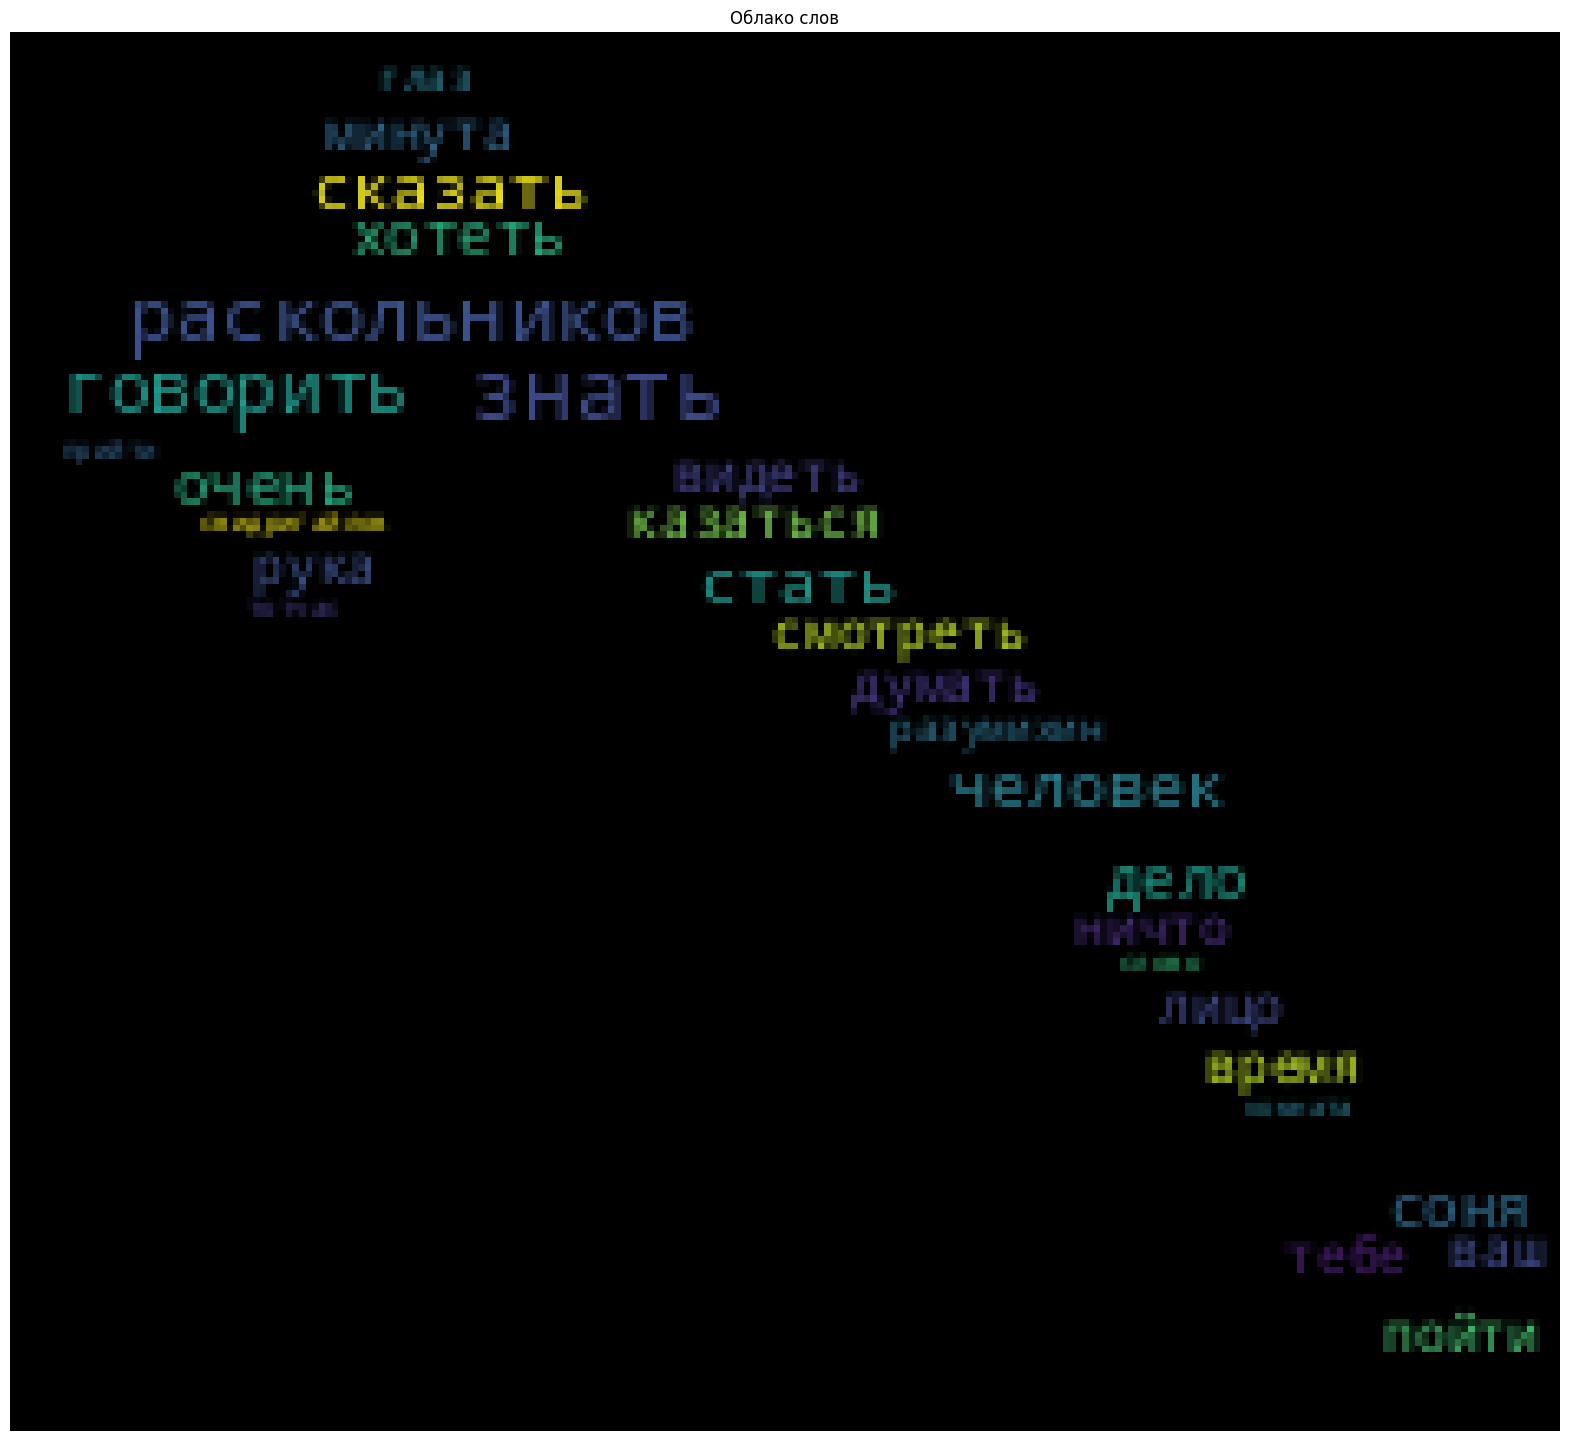

In [ ]:
text_for_cloud = ' '.join(lemmas_notstop)

wordcloud = WordCloud(background_color='black',
                      mask=mask,
                      width = mask.shape[1],
                      height = mask.shape[0],
                      ).generate(text_for_cloud)
plt.figure(figsize=(20, 20), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

## Lexical Dispersion Plot

In [ ]:
from nltk.draw.dispersion import dispersion_plot

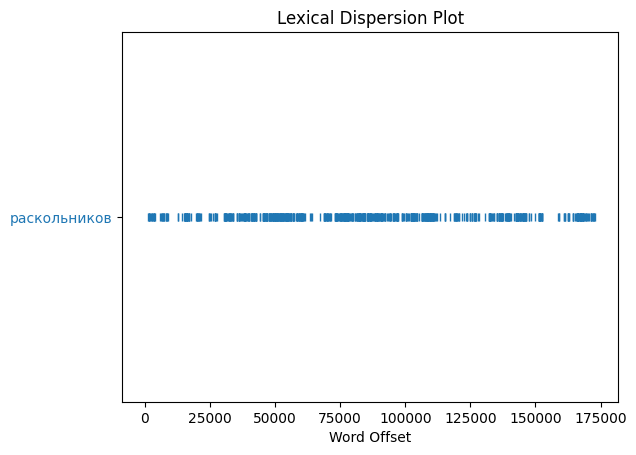

In [ ]:
n = nltk.Text(lemmas)
n.dispersion_plot(["раскольников"])

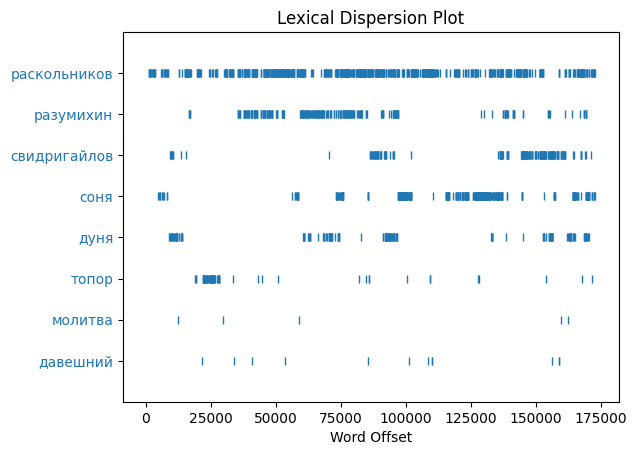

In [ ]:
n.dispersion_plot(['раскольников', 'разумихин', 'свидригайлов', 'соня', 'дуня', 'топор', 'молитва', 'давешний'])

## Именнованные сущности

Это разные имена, географические названия, названия организаций и т.д. Есть автоматизированные способы достать большой процент таких слов.

NER - Named Entity Recognition - распознавание именнованных сущностей.

Есть в spacy и stanza

In [ ]:
doc = nlp('''Таня Казакова находится в ВШЭ в Москве, любит Государственный музей имени А. С. Пушкина.''')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Таня Казакова 0 13 PER
ВШЭ 26 29 ORG
Москве 32 38 LOC
Государственный музей имени А. С. Пушкина 47 88 ORG


Посмотрим NamesExtractor из natasha

In [ ]:
! pip3 install natasha

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

In [ ]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

### Микропример:

In [ ]:
example = "Люблю Государственную библиотеку имени Ленина! Привет, Денис! Ты был c Романом Ронько в Пушкинском музее в Москве (я про Государственный музей изобразительных искусств имени А.С. Пушкина)? Увидел Лизавету и Елизавету. С Дуней."

In [ ]:
doc0 = Doc(example)
doc0

Doc(text='Люблю Государственную библиотеку имени Ленина! Пр...)

In [ ]:
doc0.segment(segmenter)

In [ ]:
doc0

Doc(text='Люблю Государственную библиотеку имени Ленина! Пр..., tokens=[...], sents=[...])

In [ ]:
print(doc0.tokens[:5])
print(doc0.sents[:5])

[DocToken(stop=5, text='Люблю'), DocToken(start=6, stop=21, text='Государственную'), DocToken(start=22, stop=32, text='библиотеку'), DocToken(start=33, stop=38, text='имени'), DocToken(start=39, stop=45, text='Ленина')]
[DocSent(stop=46, text='Люблю Государственную библиотеку имени Ленина!', tokens=[...]), DocSent(start=47, stop=61, text='Привет, Денис!', tokens=[...]), DocSent(start=62, stop=188, text='Ты был c Романом Ронько в Пушкинском музее в Моск..., tokens=[...]), DocSent(start=189, stop=217, text='Увидел Лизавету и Елизавету.', tokens=[...]), DocSent(start=218, stop=226, text='С Дуней.', tokens=[...])]


In [ ]:
doc0.tag_morph(morph_tagger)

In [ ]:
doc0.sents[0].morph.print()

               Люблю VERB|Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act
     Государственную ADJ|Case=Acc|Degree=Pos|Gender=Fem|Number=Sing
          библиотеку NOUN|Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing
               имени NOUN|Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing
              Ленина PROPN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
                   ! PUNCT


In [ ]:
for token in doc0.tokens:
    token.lemmatize(morph_vocab)
print(doc0.tokens[:5])

[DocToken(stop=5, text='Люблю', pos='VERB', feats=<Imp,Ind,Sing,1,Pres,Fin,Act>, lemma='любить'), DocToken(start=6, stop=21, text='Государственную', pos='ADJ', feats=<Acc,Pos,Fem,Sing>, lemma='государственный'), DocToken(start=22, stop=32, text='библиотеку', pos='NOUN', feats=<Inan,Acc,Fem,Sing>, lemma='библиотека'), DocToken(start=33, stop=38, text='имени', pos='NOUN', feats=<Inan,Gen,Neut,Sing>, lemma='имя'), DocToken(start=39, stop=45, text='Ленина', pos='PROPN', feats=<Anim,Gen,Masc,Sing>, lemma='ленин')]


In [ ]:
doc0.tag_ner(ner_tagger)

In [ ]:
doc0

Doc(text='Люблю Государственную библиотеку имени Ленина! Пр..., tokens=[...], spans=[...], sents=[...])

In [ ]:
doc0.spans

[DocSpan(start=6, stop=45, type='ORG', text='Государственную библиотеку имени Ленина', tokens=[...]),
 DocSpan(start=55, stop=60, type='PER', text='Денис', tokens=[...]),
 DocSpan(start=71, stop=85, type='PER', text='Романом Ронько', tokens=[...]),
 DocSpan(start=88, stop=104, type='ORG', text='Пушкинском музее', tokens=[...]),
 DocSpan(start=107, stop=113, type='LOC', text='Москве', tokens=[...]),
 DocSpan(start=121, stop=186, type='ORG', text='Государственный музей изобразительных искусств им..., tokens=[...]),
 DocSpan(start=196, stop=204, type='PER', text='Лизавету', tokens=[...]),
 DocSpan(start=207, stop=216, type='PER', text='Елизавету', tokens=[...]),
 DocSpan(start=220, stop=225, type='PER', text='Дуней', tokens=[...])]

In [ ]:
for span in doc0.spans:
    span.normalize(morph_vocab)
for span in doc0.spans:
    print(span)
doc0.spans[5].normal

DocSpan(start=6, stop=45, type='ORG', text='Государственную библиотеку имени Ленина', tokens=[...], normal='Государственная библиотека имя Ленин')
DocSpan(start=55, stop=60, type='PER', text='Денис', tokens=[...], normal='Денис')
DocSpan(start=71, stop=85, type='PER', text='Романом Ронько', tokens=[...], normal='Роман Ронько')
DocSpan(start=88, stop=104, type='ORG', text='Пушкинском музее', tokens=[...], normal='Пушкинский музей')
DocSpan(start=107, stop=113, type='LOC', text='Москве', tokens=[...], normal='Москва')
DocSpan(start=121, stop=186, type='ORG', text='Государственный музей изобразительных искусств им..., tokens=[...], normal='Государственный музей изобразительные искусства и...)
DocSpan(start=196, stop=204, type='PER', text='Лизавету', tokens=[...], normal='Лизавету')
DocSpan(start=207, stop=216, type='PER', text='Елизавету', tokens=[...], normal='Елизавета')
DocSpan(start=220, stop=225, type='PER', text='Дуней', tokens=[...], normal='Дуней')


'Государственный музей изобразительные искусства имя А.С. Пушкин'

In [ ]:
for span in doc0.spans:
    if span.type == 'PER':
        print(span.normal)

Денис
Роман Ронько
Лизавету
Елизавета
Дуней


Запомним, что такая нормализация имён вызывает затруднения.

### Вернёмся к тексту

In [ ]:
with open('pin.txt', 'r', encoding='UTF-8') as f:
    text = f.read()
print(text[:50])

Часть первая

I

   В начале июля, в чрезвычайно ж


In [ ]:
normal_names = []
doc = Doc(text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.tag_ner(ner_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)
for span in doc.spans:
    span.normalize(morph_vocab)
    if span.type == 'PER':
        normal_names.append(span.normal)

In [ ]:
normal_names[:20]  # tag_ner делит NE по типам, но в имена записывает довольно много мусора
# А вот names_extractor хорошо понимает, как должны выглядеть имена, но не умеет определять тип NE
# Горох - царь Горох

['Горохе',
 'Раскольников',
 'Раскольников',
 'Раскольников',
 'Алена Ивановна',
 'Алена Ивановна',
 'Алена Ивановна',
 'Раскольников',
 'Оглядевшись',
 'Раскольников',
 'Цел-лый',
 'По Подьяческой',
 'Раскольников',
 'Раскольников',
 'Раскольников',
 'Мармеладов --',
 'Раскольников',
 'Лебезятников',
 'Раскольников',
 'Мармеладов']

In [ ]:
len(set(normal_names))

478

In [ ]:
# микропример
matches = list(names_extractor('Оглядевшись, Таня Казакова увидела Файера Владимира Владимировича.'))
matches

[Match(
     start=13,
     stop=26,
     fact=Name(
         first='Таня',
         last='Казакова',
         middle=None
     )
 ),
 Match(
     start=35,
     stop=65,
     fact=Name(
         first='Владимира',
         last='Файера',
         middle='Владимировича'
     )
 )]

In [ ]:
# можно смотреть ифо у нормализованных имён
for name in normal_names[:5]:
    matches = list(names_extractor(name))
    print(matches)

[Match(start=0, stop=6, fact=Name(first=None, last='Горохе', middle=None))]
[Match(start=0, stop=12, fact=Name(first=None, last='Раскольников', middle=None))]
[Match(start=0, stop=12, fact=Name(first=None, last='Раскольников', middle=None))]
[Match(start=0, stop=12, fact=Name(first=None, last='Раскольников', middle=None))]
[Match(start=0, stop=14, fact=Name(first='Алена', last='Ивановна', middle=None))]


In [ ]:
# а можно names_extractor у ненормализованных спанов с тегом PER
for span in doc.spans:
    if span.type == PER:
        span.extract_fact(names_extractor)

In [ ]:
# если там есть fact, там есть ИФО
for span in doc.spans[:16]:
    if span.fact:
        print(span.fact.slots)

[Slot(key='last', value='Горохе')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Раскольников')]
[Slot(key='first', value='Алена'), Slot(key='last', value='Ивановна')]
[Slot(key='first', value='Алена'), Slot(key='last', value='Ивановна')]
[Slot(key='first', value='Алена'), Slot(key='last', value='Ивановна')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Цел')]
[Slot(key='last', value='По')]
[Slot(key='last', value='Раскольников')]


Нормализация в mystem сильнее (например, "Дуней" > "Дуня", а не "Дуней" > "Дуней")

In [ ]:
! pip3 install pymystem3

In [ ]:
from pymystem3 import Mystem
m = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
name_lem = []
for span in doc.spans:
  if span.fact:
      name = ''
      for slot in span.fact.slots:   # вытаскиваем из слотов имя, фамилию или отчество
          name += m.lemmatize(slot.value)[0] + ' ' # и будем лемматизировать их с помощью Mystem
      name_lem.append(name.strip() if len(name)>3 else '') # избавляемся от По, К, Ай и др.

In [ ]:
len(set(name_lem)), sorted(list(set(name_lem)))[15:35]

(252,
 ['амалия липпевехзель',
  'амалия липпевехзель федоровна',
  'амалия людвиговна',
  'амалия федоровна',
  'амаль',
  'амаль людвиговна',
  'андрей',
  'андрей лебезятник семенович',
  'андрей лебезятник семеныч',
  'андрей семенович',
  'андрей семеныч',
  'анна',
  'аркадий',
  'аркадий иванович',
  'аркадий свидригайлов иванович',
  'афанасий',
  'афанасий вахрушин иванович',
  'афанасий иванович',
  'афанасий павлыч',
  'ахиллес'])

Помимо очевидного мусора есть большие проблемы.
1. Одного человека могут звать 5-10 способами (это решается с помощью словаря соответствий)
2. Разных людей могут называть одним именем (сильно усложняет, это надо по контексту определять) (Иван Афанасьевич, Иван Иванович, Иван Михайлыч - если в тексте просто "Иван", это кто?)
3. Бабушкин и чиновник, и сон (смешение имён собственных и нарицательных)

In [ ]:
name_mapping = {
  'авдотья': 'Дуня',
  'авдотья раскольникова романовна': 'Дуня',
  'авдотья романовна': 'Дуня',
  'александр григорьевич': 'Заметов',
  'алексей семенович': 'Алексей Семенович',
  'алена': 'Процентщица',
  'алена ивановна': 'Процентщица',
  'алешка': 'Алексей Семенович',
  'али зосимов': 'Зосимов',
  'амалия': 'Липпевехзель',
  'амалия ивановна': 'Липпевехзель',
  'амалия липпевехзель': 'Липпевехзель',
  'амалия липпевехзель федоровна': 'Липпевехзель',
  'амалия людвиговна': 'Липпевехзель',
  'амалия федоровна': 'Липпевехзель',
  'амаль': 'Липпевехзель',
  'амаль людвиговна': 'Липпевехзель',
  'андрей': 'Лебезятников',
  'андрей лебезятник семенович': 'Лебезятников',
  'андрей лебезятник семеныч': 'Лебезятников',
  'андрей семенович': 'Лебезятников',
  'андрей семеныч': 'Лебезятников',
  'аркадий': 'Свидригайлов',
  'аркадий иванович': 'Свидригайлов',
  'аркадий свидригайлов иванович': 'Свидригайлов',
  'афанасий': 'Вахрушин',
  'афанасий вахрушин иванович': 'Вахрушин',
  'афанасий иванович': 'Вахрушин',
  'афанасий павлыч': 'Афанасий Павлович',
  'бабушкин': 'Бабушкин',
  'бакалеев': 'Бакалеев',
  'берг': 'Берг',
  'вася': 'Вася',
  'вахрушин': 'Вахрушин',
  'вразумихин': 'Разумихин',
  'гертруда карловна': 'Ресслих',
  'гертруда ресслиха карловна': 'Ресслих',
  'дарья францевна': 'Дарья Францевна',
  'дмитрий': 'Разумихин',
  'дун': 'Дуня',
  'дунечка': 'Дуня',
  'дунечкин': 'Дуня',
  'дуня': 'Дуня',
  'дуня любить': 'Дуня',
  'заметов': 'Заметов',
  'заметова': 'Заметов',
  'зарницын': 'Зарницына',
  'зарницына': 'Зарницына',
  'зосимов': 'Зосимов',
  'зосимов разумихин': 'Зосимов',
  'зосимова': 'Зосимов',
  'иван афанасьевич': 'Иван Афанасьевич',
  'иван иванович': 'Иван Иванович',
  'иван михайлыч': 'Иван Михайлыч',
  'илья петрович': 'Порох',
  'илья порох петрович': 'Порох',
  'капернаумов': 'Капернаумов',
  'катерина': 'Катерина Ивановна',
  'катерина ивановна': 'Катерина Ивановна',
  'катерина раскольников ивановна': 'Катерина Ивановна',
  'катерина смешливый ивановна': 'Катерина Ивановна',
  'катя': 'Катерина Ивановна',
  'катя начинать': 'Катерина Ивановна',
  'колька': 'Миколка',
  'коля': 'Миколка',
  'кох': 'Кох',
  'лавиза': 'Лизавета Ивановна',
  'лавиза ивановна': 'Лизавета Ивановна',
  'лазарь': 'Лазарь',
  'лебезятник': 'Лебезятников',
  'лебезятников': 'Лебезятников',
  'лидочка': 'Лидочка Мармеладова',
  'лизавета': 'Лизавета Ивановна',
  'лизавета ивановна': 'Лизавета Ивановна',
  'лизаветин': 'Лизавета Ивановна',
  'лужин': 'Лужин',
  'луиза ивановна': 'Лизавета Ивановна',
  'мармеладов': 'Мармеладов',
  'марфа': 'Свидригайлова',
  'марфа петровна': 'Свидригайлова',
  'матвей': 'Матвей',
  'миколай': 'Миколка',
  'миколай дементьев': 'Миколка',
  'миколка': 'Миколка',
  'миколка молодец': 'Миколка',
  'митрей': 'Митрей',
  'митька': 'Митька',
  'настасья': 'Настасья',
  'настасья никифоровна': 'Настасья',
  'настенька': 'Настасья',
  'наталья егоровна': 'Наталья Егоровна',
  'никифоров': 'Настасья',
  'никодим': 'Никодим Фомич',
  'никодим фомич': 'Никодим Фомич',
  'николай': 'Миколка',
  'николашка': 'Миколка',
  'нил павлыч': 'Нил Павлыч',
  'п лужин': 'Лужин',
  'параша': 'Пашенька',
  'пашенька': 'Пашенька',
  'пестряков': 'Пестряков',
  'петр': 'Лужин',
  'петр лужин петрович': 'Лужин',
  'петр петрович': 'Лужин',
  'петр разумихин петрович': 'Лужин',
  'петров': 'Лужин',
  'пол': 'Полечка Мармеладова',
  'поле': 'Полечка Мармеладова',
  'поленька': 'Полечка Мармеладова',
  'полечка': 'Полечка Мармеладова',
  'полина михайловна': 'Полечка Мармеладова',
  'поля': 'Полечка Мармеладова',
  'порох': 'Порох',
  'порфирий': 'Порфирий Петрович',
  'порфирий петрович': 'Порфирий Петрович',
  'порфирий раскольников петрович': 'Порфирий Петрович',
  'прасковья': 'Зарницына',
  'прасковья павловна': 'Зарницына',
  'прилукова': 'Прилукова',
  'пульхерия александровна': 'Пульхерия Александровна',
  'пульхерия раскольников': 'Пульхерия Александровна',
  'пульхерия раскольников александровна': 'Пульхерия Александровна',
  'разумихин': 'Разумихин',
  'разумихина': 'Разумихин',
  'раскольников': 'Раскольников',
  'рассудкин': 'Рассудкин',
  'род': 'Раскольников',
  'родион': 'Раскольников',
  'родион раскольников': 'Раскольников',
  'родион раскольников романович': 'Раскольников',
  'родион ро': 'Раскольников',
  'родион романович': 'Раскольников',
  'родион романыч': 'Раскольников',
  'родька': 'Раскольников',
  'родькин': 'Раскольников',
  'родя': 'Раскольников',
  'свидригайлов': 'Свидригайлов',
  'семен захарович': 'Мармеладов',
  'семен захарыч': 'Мармеладов',
  'семен семенович': 'Семён Семёнович',
  'сонечка': 'Соня',
  'сонечка мармеладов': 'Соня',
  'сонечкин': 'Соня',
  'соня': 'Соня',
  'соня разумихин': 'Соня',
  'софья': 'Соня',
  'софья мармеладов семеновна': 'Соня',
  'софья семеновна': 'Соня',
  'теребьев': 'Теребьева',
  'федосья': 'Федосья',
  'филипп': 'Филипп',
  'филька': 'Филипп',
  'фомич': 'Никодим Фомич',
  'циммерман': 'Цимерман',
  'чебаров': 'Чебаров',
  'шиллер': 'Шиллер',
  'шиль': 'Шиль',
  'щегольской': 'князь Щегольской',
  'юшин': 'купец Юшин'}

Хочется нарисовать граф связей, кто с кем взаимодействует в тексте.

Идём по спанам PER. Если предыдущий в списке и этот персонаж на расстоянии друг от друга не больше X (например, небольше 100 символов), то сохраняем, что они встретились вместе. А потом граф, где вершины персонажи, а рёбра связи.

В [статье Системного Блока](https://vk.com/@sysblok-socseti-russkoi-dramy-chast-i-osnovy-setevogo-analiza) подробный рассказ и с картинками

[DraCor](https://dracor.org/) - корпуса пьес, с подобной разметкой: можно посмотреть на граф и скачать в разных форматах информацию о том, кто с кем разговаривал и кому кем приходится.

### Граф связей

In [ ]:
# NetworkX - отличная библиотека для графов
! pip install networkx

In [ ]:
import networkx as nx

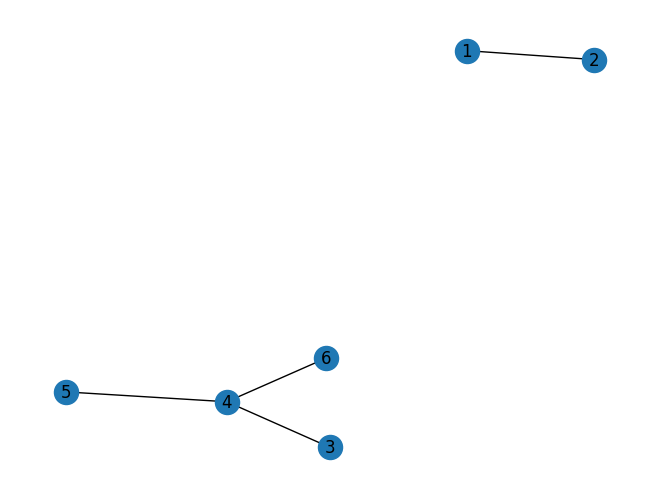

In [ ]:
from random import random
G = nx.Graph()
G.add_edges_from([(3, 4), (4, 5), (1, 2), (4, 6)])

nx.draw(G, with_labels=True)

In [ ]:
print(G)

Graph with 6 nodes and 4 edges


In [ ]:
prevname = ''
stop = - 100
all_pairs = {}
for span in doc.spans:
    if span.fact:
        name = ''
        for slot in span.fact.slots:   # вытаскиваем из слотов имя, фамилию или отчество
            name += m.lemmatize(slot.value)[0] + ' ' # и будем лемматизируем
        name = name.strip() if len(name)>3 else ''
        if name in name_mapping:
            common_name = name_mapping[name]
            start = span.stop
            if start-stop < 100 and prevname != common_name:  # Сохраняем пару, если расстояние между героями меньше 100 символов
                pair = tuple(sorted([prevname, common_name]))
                if pair not in all_pairs:
                    all_pairs[pair] = 1
                else:
                    all_pairs[pair] += 1

            stop = span.stop
            prevname = common_name

In [ ]:
all_pairs

{('Процентщица', 'Раскольников'): 4,
 ('Мармеладов', 'Раскольников'): 9,
 ('Дарья Францевна', 'Катерина Ивановна'): 1,
 ('Катерина Ивановна', 'Соня'): 56,
 ('Дарья Францевна', 'Соня'): 1,
 ('Дарья Францевна', 'Лебезятников'): 1,
 ('Лебезятников', 'Соня'): 12,
 ('Капернаумов', 'Катерина Ивановна'): 2,
 ('Катерина Ивановна', 'Липпевехзель'): 20,
 ('Раскольников', 'Соня'): 47,
 ('Катерина Ивановна', 'Раскольников'): 22,
 ('Дуня', 'Свидригайлов'): 26,
 ('Свидригайлов', 'Свидригайлова'): 10,
 ('Дуня', 'Свидригайлова'): 20,
 ('Дуня', 'Раскольников'): 39,
 ('Лужин', 'Свидригайлова'): 2,
 ('Дуня', 'Лужин'): 39,
 ('Лужин', 'Раскольников'): 31,
 ('Вахрушин', 'Лужин'): 1,
 ('Пульхерия Александровна', 'Раскольников'): 29,
 ('Дуня', 'Соня'): 21,
 ('Лужин', 'Соня'): 29,
 ('Вахрушин', 'Свидригайлов'): 1,
 ('Разумихин', 'Раскольников'): 83,
 ('Лизавета Ивановна', 'Процентщица'): 4,
 ('Лизавета Ивановна', 'Раскольников'): 4,
 ('Кох', 'Раскольников'): 1,
 ('Заметов', 'Раскольников'): 4,
 ('Зарницына', '

In [ ]:
max_con = max(all_pairs[i] for i in all_pairs)
max_con # есть персонажи, которые встретились рядом 83 раза

83

In [ ]:
G = nx.Graph()
for pair in all_pairs:
    n1, n2 = pair
    G.add_edge(n1, n2)

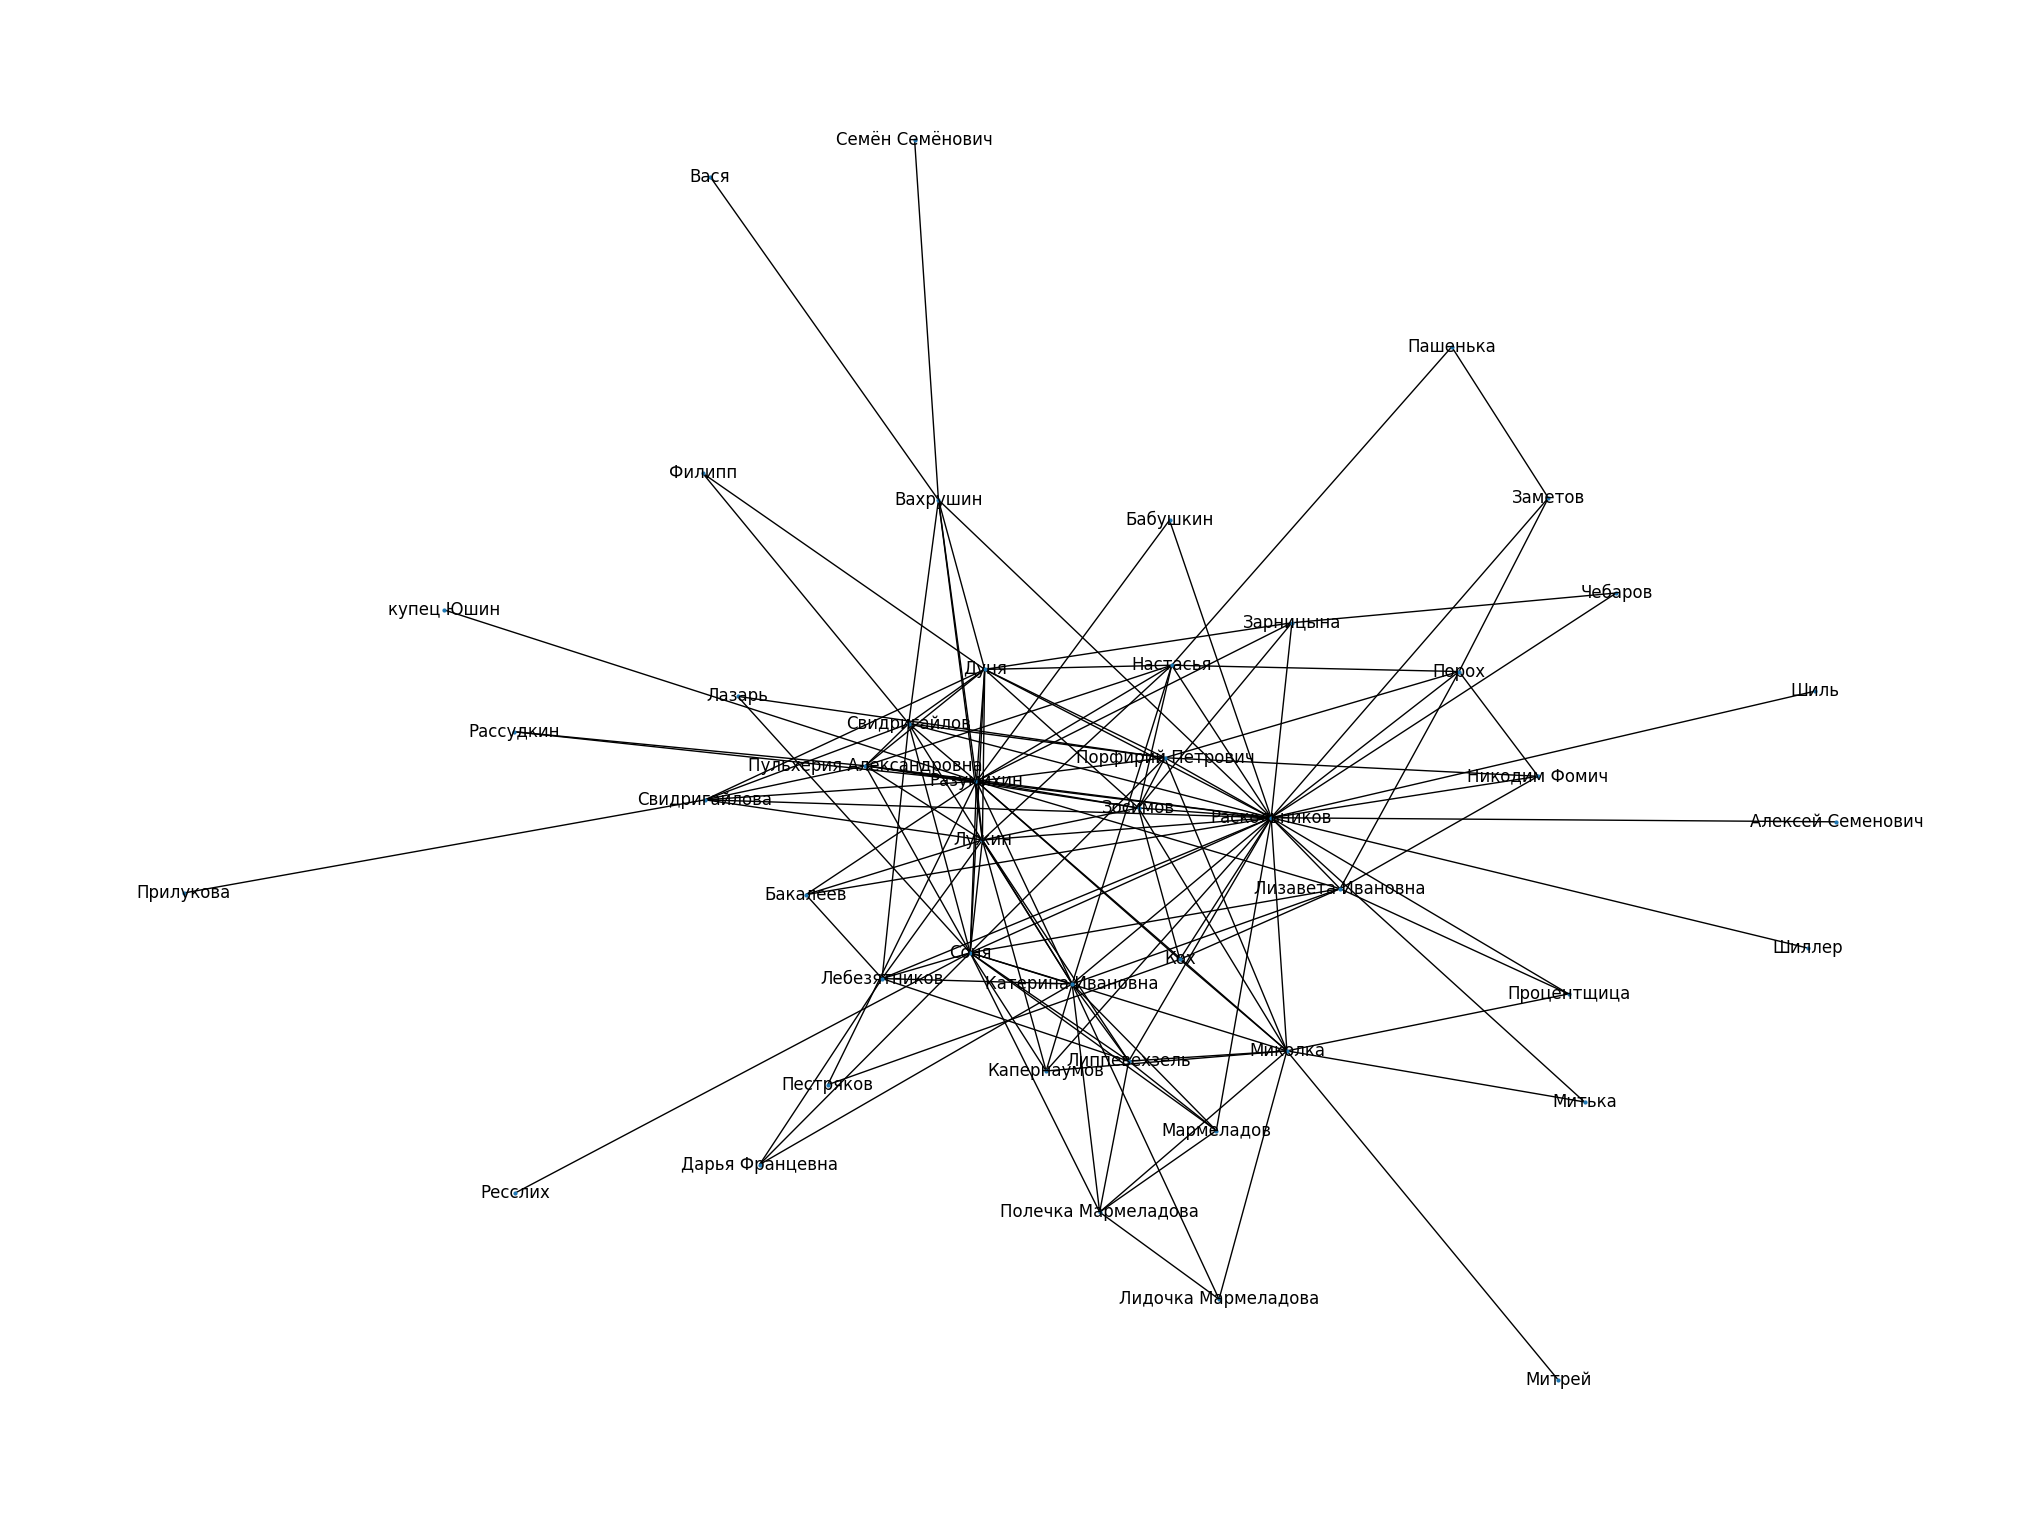

In [ ]:
plt.figure(figsize=(20, 15))

nx.draw(G, with_labels=True, node_size=4, width=1)

In [ ]:
G = nx.Graph()
for pair in all_pairs:
    n1, n2 = pair
    w = all_pairs[pair] / max_con

    # добавить в граф ребро от n1 к n2 с весом w
    G.add_edge(n1, n2, weight=w)

In [ ]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

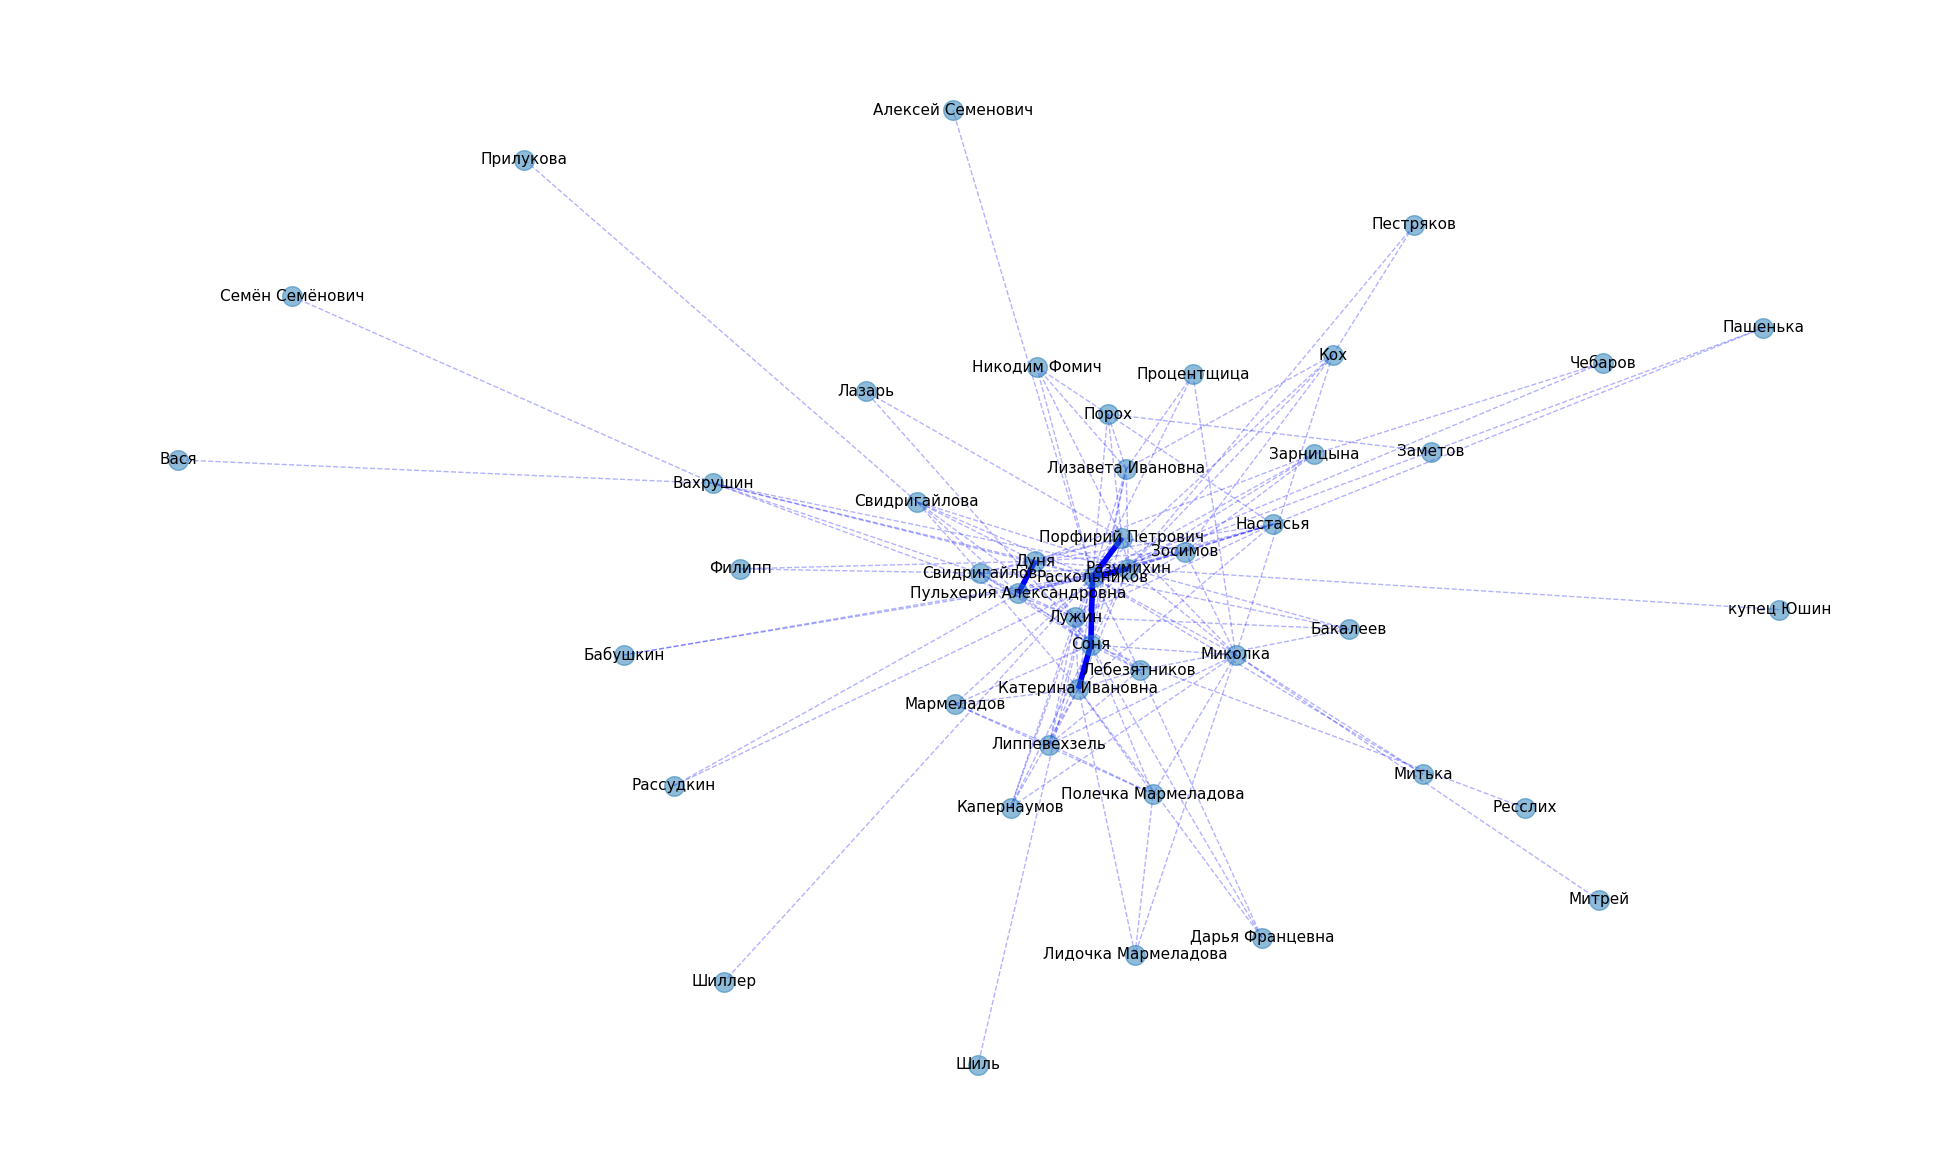

In [ ]:
# у графов много разных раскладок (способов расположить вешины)
pos = nx.spring_layout(G)  # часто используют этот

plt.figure(figsize=(25, 15))

# рисуем вершины
nx.draw_networkx_nodes(G, pos, node_size=200, alpha=0.5)
# рисуем популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4, edge_color='b')
# рисуем менее популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.3, edge_color='b', style='dashed')
# подписи
nx.draw_networkx_labels(G, pos, font_size=11, font_family='sans-serif')

plt.axis('off')
plt.show()

Пусть размеры вершин соответствуют частотности персонажей

In [ ]:
# вершины
G.nodes

NodeView(('Процентщица', 'Раскольников', 'Мармеладов', 'Дарья Францевна', 'Катерина Ивановна', 'Соня', 'Лебезятников', 'Капернаумов', 'Липпевехзель', 'Дуня', 'Свидригайлов', 'Свидригайлова', 'Лужин', 'Вахрушин', 'Пульхерия Александровна', 'Разумихин', 'Лизавета Ивановна', 'Кох', 'Заметов', 'Зарницына', 'Чебаров', 'Никодим Фомич', 'Порох', 'Настасья', 'Семён Семёнович', 'Зосимов', 'Пашенька', 'Миколка', 'Митрей', 'Пестряков', 'Бакалеев', 'купец Юшин', 'Бабушкин', 'Митька', 'Алексей Семенович', 'Шиль', 'Лидочка Мармеладова', 'Полечка Мармеладова', 'Вася', 'Порфирий Петрович', 'Ресслих', 'Лазарь', 'Прилукова', 'Филипп', 'Рассудкин', 'Шиллер'))

In [ ]:
persons = {}
for person in G.nodes:
    persons[person] = 0
for person in G.nodes:
    for pair in all_pairs:
        if person in pair:
            persons[person] += 1
persons

{'Процентщица': 3,
 'Раскольников': 31,
 'Мармеладов': 5,
 'Дарья Францевна': 3,
 'Катерина Ивановна': 14,
 'Соня': 18,
 'Лебезятников': 8,
 'Капернаумов': 5,
 'Липпевехзель': 8,
 'Дуня': 13,
 'Свидригайлов': 11,
 'Свидригайлова': 7,
 'Лужин': 14,
 'Вахрушин': 7,
 'Пульхерия Александровна': 10,
 'Разумихин': 21,
 'Лизавета Ивановна': 8,
 'Кох': 6,
 'Заметов': 3,
 'Зарницына': 5,
 'Чебаров': 2,
 'Никодим Фомич': 4,
 'Порох': 6,
 'Настасья': 9,
 'Семён Семёнович': 1,
 'Зосимов': 10,
 'Пашенька': 2,
 'Миколка': 13,
 'Митрей': 1,
 'Пестряков': 2,
 'Бакалеев': 4,
 'купец Юшин': 1,
 'Бабушкин': 2,
 'Митька': 2,
 'Алексей Семенович': 1,
 'Шиль': 1,
 'Лидочка Мармеладова': 3,
 'Полечка Мармеладова': 6,
 'Вася': 1,
 'Порфирий Петрович': 10,
 'Ресслих': 1,
 'Лазарь': 2,
 'Прилукова': 1,
 'Филипп': 2,
 'Рассудкин': 2,
 'Шиллер': 1}

In [ ]:
import numpy as np

In [ ]:
# вот такие у нас будут размеры узлов
sizes = np.array(list(persons.values()))
sizes *= 15
sizes

array([ 45, 465,  75,  45, 210, 270, 120,  75, 120, 195, 165, 105, 210,
       105, 150, 315, 120,  90,  45,  75,  30,  60,  90, 135,  15, 150,
        30, 195,  15,  30,  60,  15,  30,  30,  15,  15,  45,  90,  15,
       150,  15,  30,  15,  30,  30,  15])

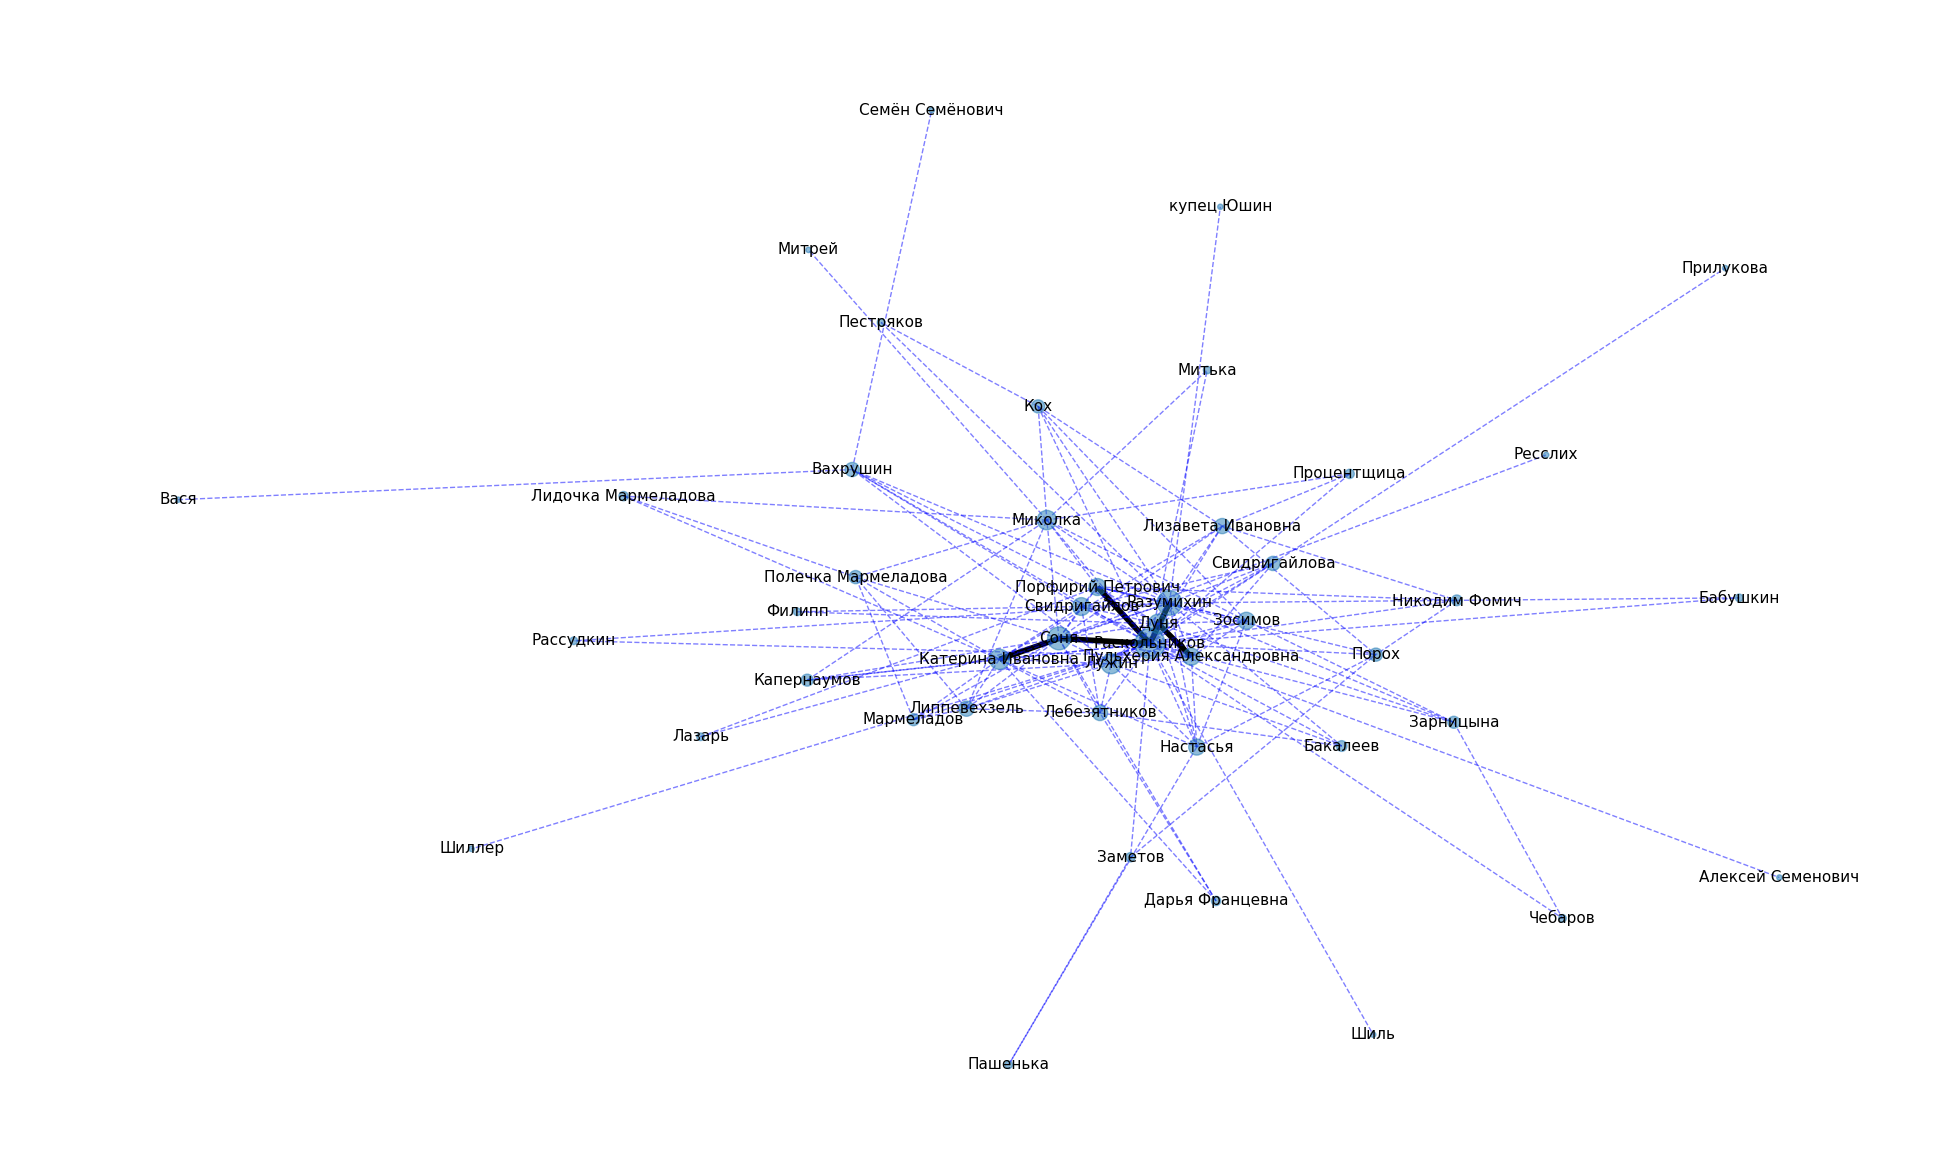

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(25, 15))

nx.draw_networkx_nodes(G, pos, node_size=sizes, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=11, font_family='sans-serif')

plt.axis('off')
plt.show()

In [ ]:
G = nx.Graph()
for pair in all_pairs:
    n1, n2 = pair
    w = all_pairs[pair] / 3

    # добавить в граф ребро от n1 к n2 с весом w
    G.add_edge(n1, n2, weight=w)

In [ ]:
persons = {}
for person in G.nodes:
    persons[person] = 0
for person in G.nodes:
    for pair in all_pairs:
        if person in pair:
            persons[person] += 1

In [ ]:
# вот такие у нас будут размеры узлов
sizes = np.array(list(persons.values()))
sizes *= 30
sizes

array([ 90, 930, 150,  90, 420, 540, 240, 150, 240, 390, 330, 210, 420,
       210, 300, 630, 240, 180,  90, 150,  60, 120, 180, 270,  30, 300,
        60, 390,  30,  60, 120,  30,  60,  60,  30,  30,  90, 180,  30,
       300,  30,  60,  30,  60,  60,  30])

In [ ]:
edge_widths = [w for (*edge, w) in G.edges.data('weight')]

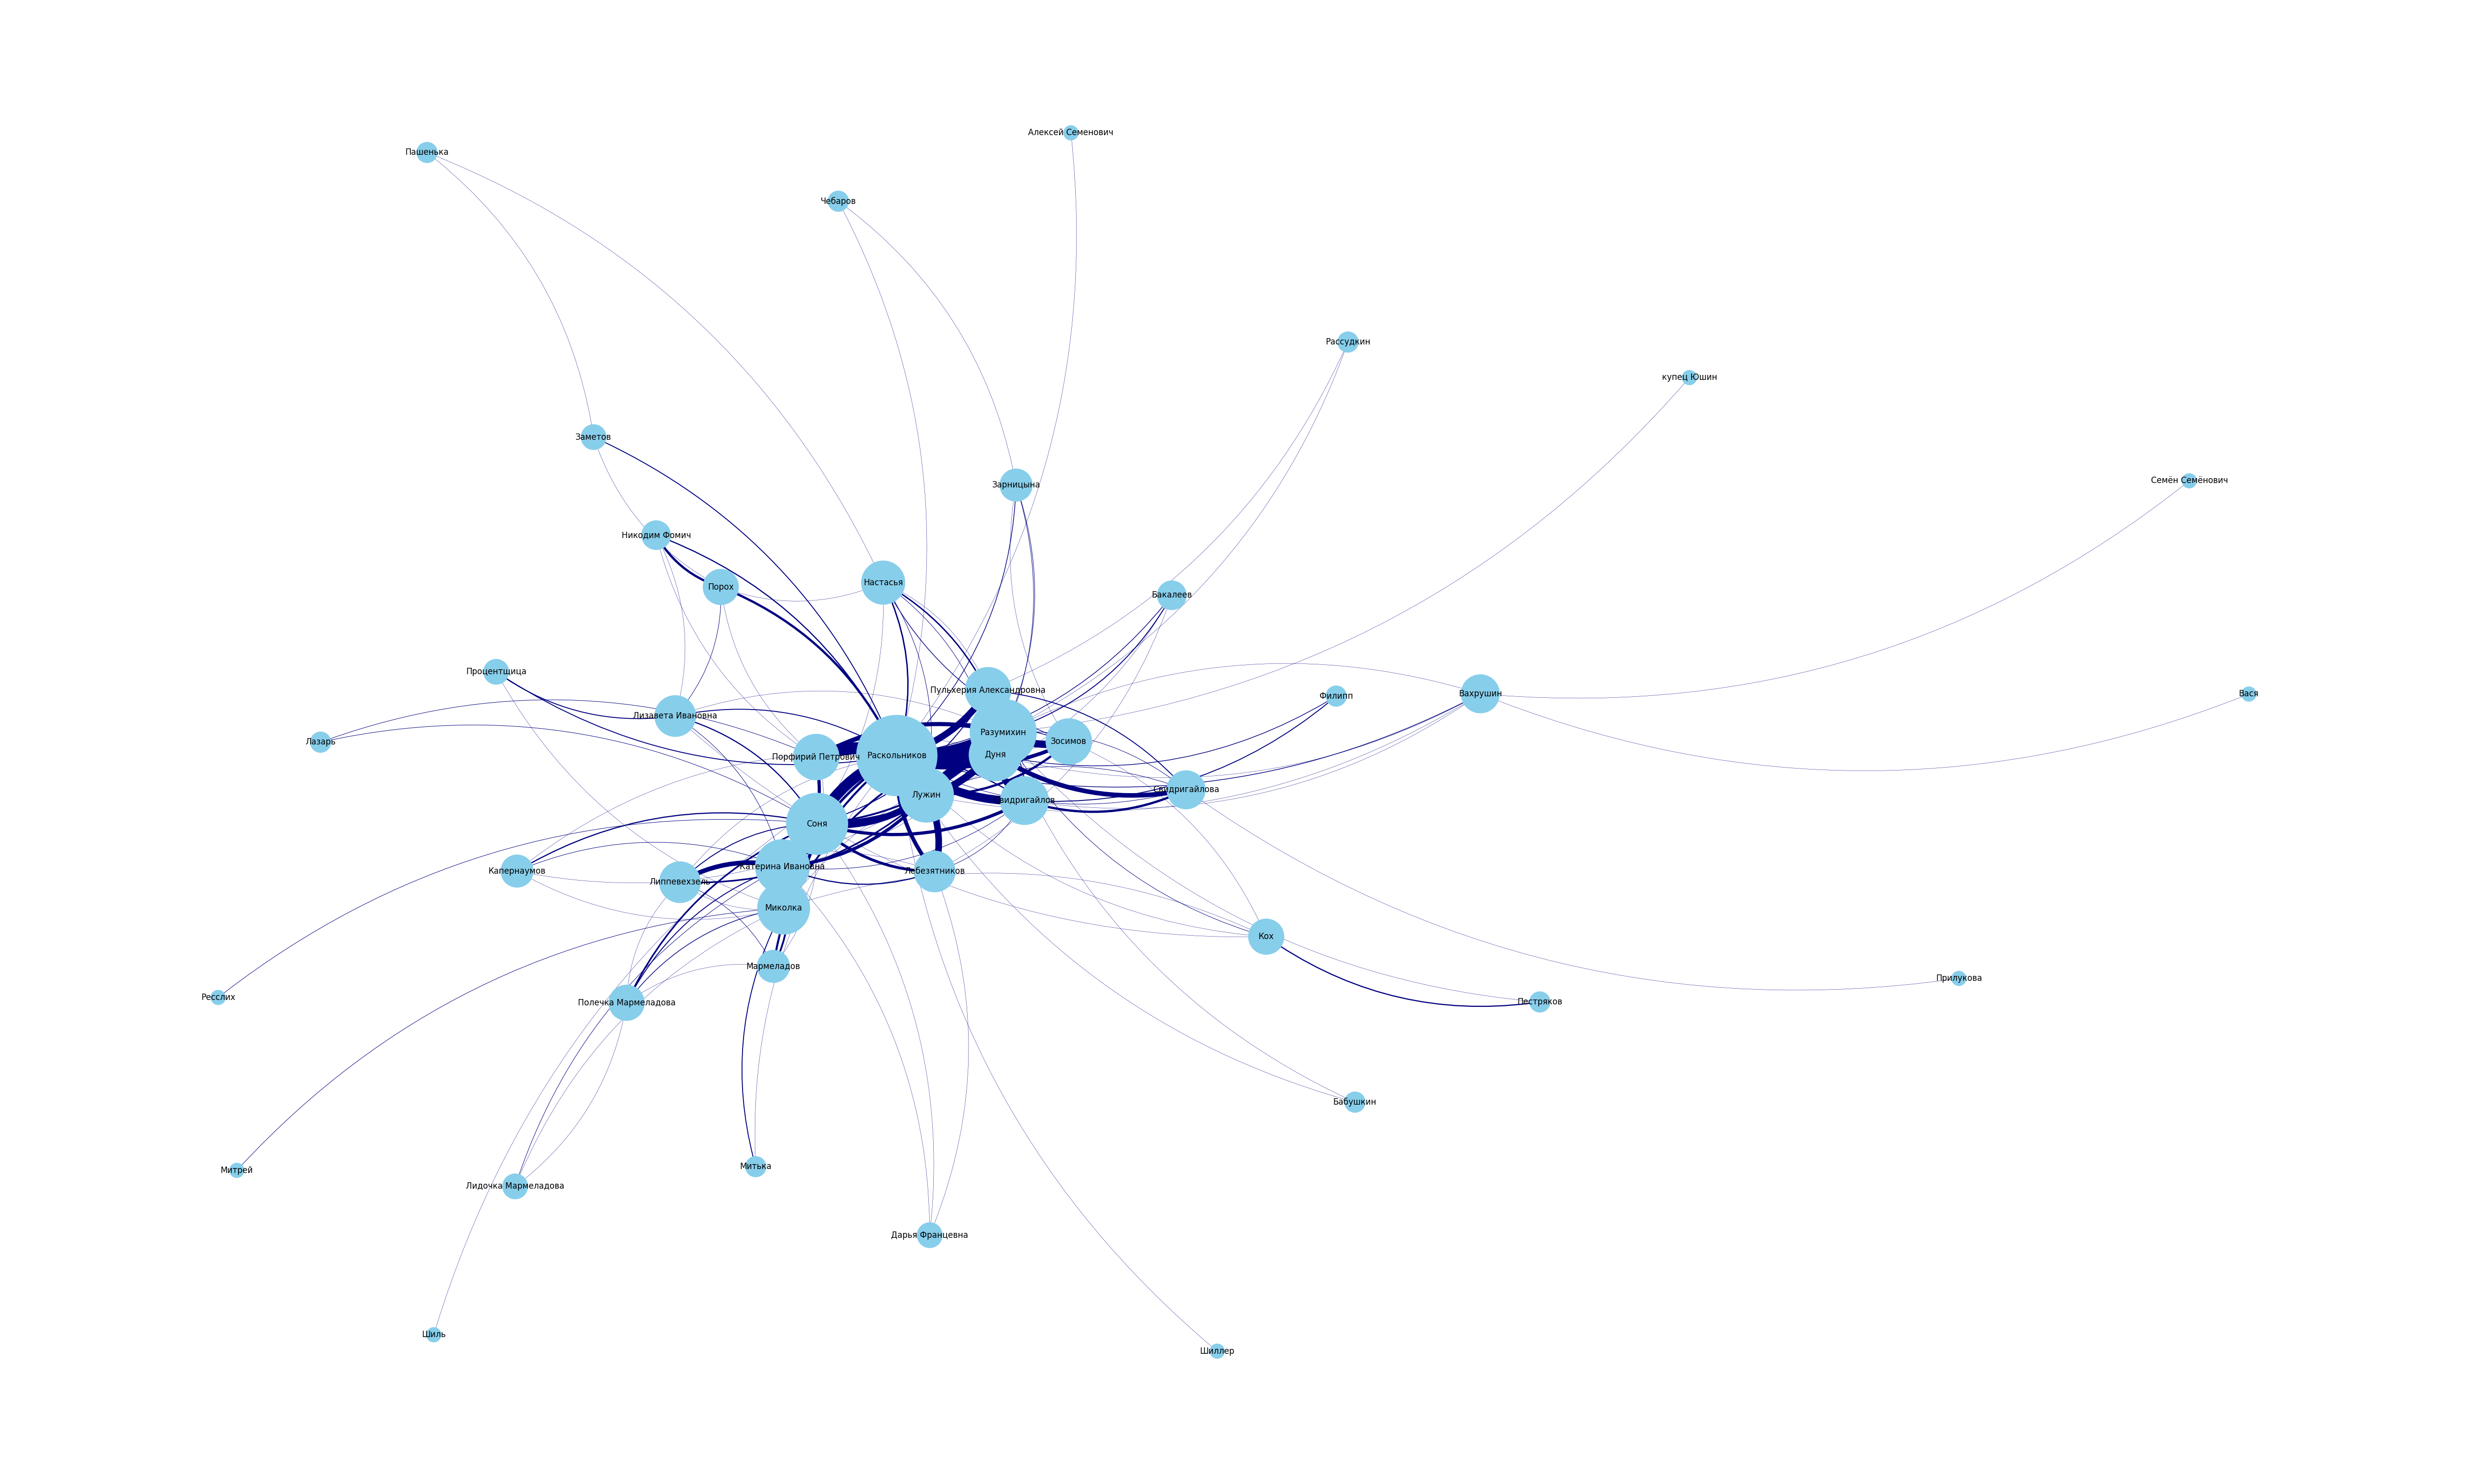

In [ ]:
fig = plt.figure(figsize=(50, 30))

nx.draw_spring(
    G,
    with_labels=True,
    node_size=sizes*15,
    node_color='skyblue',
    arrows=True,
    width=edge_widths,
    font_size=12,
    connectionstyle="arc3, rad=0.2",
    edge_color='navy'
    )

In [ ]:
plt.savefig('graph.png')

<Figure size 640x480 with 0 Axes>

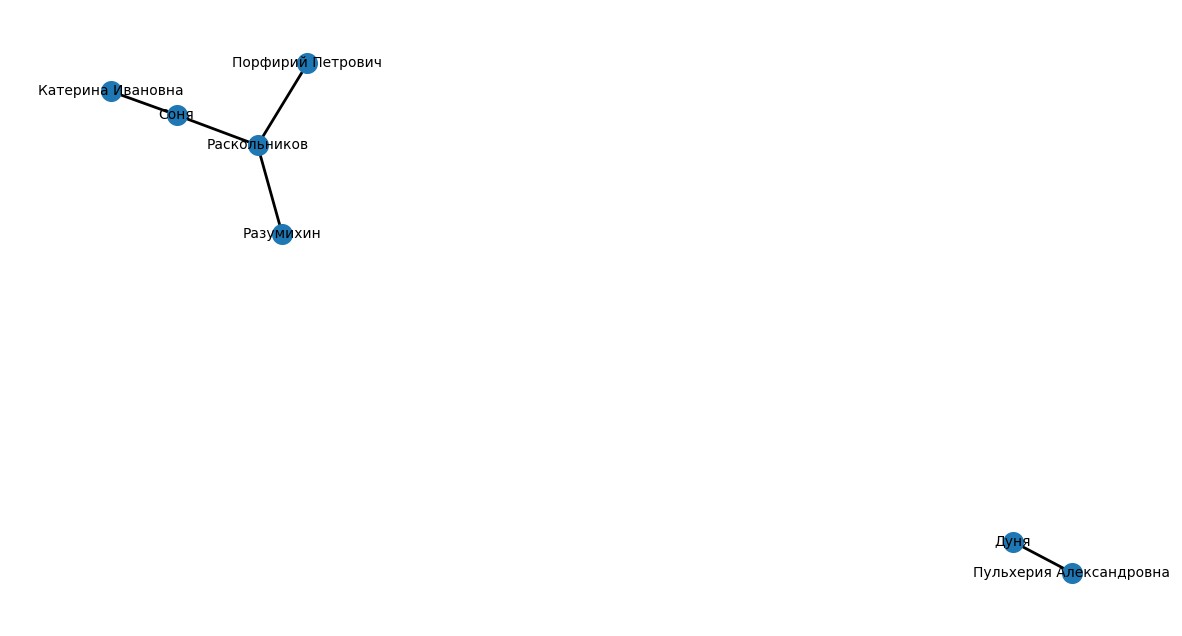

In [ ]:
G2 = G.edge_subgraph(elarge)
pos = nx.spring_layout(G2)
plt.figure(figsize=(15, 8))

# рисуем вершины
nx.draw_networkx_nodes(G2, pos, node_size=200)

# рисуем популярные свзяи
nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=2)

# подписи
nx.draw_networkx_labels(G2, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()